# Capstone Project - Wine Quality (Red)

## 1. Introduction
The goal of this project is to create a model that estimates the subjective rating of a wine as graded by experts, using as inputs (features) the physicochemical properties of the wine.

There are two datasets, one for white wine (4,898 wines) and one for red (1,599 wines). They are all variants of the Portuguese "Vinho Verde" wine.

This dataset could be used as a classification or a regression problem. I will be doing regression. Since wine properties are very different for white and red wines, I will be doing a separate analysis for each type of wine. I will be only doing the red wine dataset in this notebook. There is another notebook for the white wine.

We found that it is possible to achieve reasonably accurate predictions of the rating by using a Random Forest approach. Using this data based approach can help wine producers supplement their traditional tasting methods.

### 1.1 Acknowledgements

#### This project was made possible by the generosity of: 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis.   
"Modeling wine preferences by data mining from physicochemical properties."  
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

#### Available at:  
@Elsevier: http://dx.doi.org/10.1016/j.dss.2009.05.016    
Pre-press (pdf): http://www3.dsi.uminho.pt/pcortez/winequality09.pdf  
bib: http://www3.dsi.uminho.pt/pcortez/dss09.bib

## 2. Library Imports

#### The first step is to import the libraries we are going to need in the project.
* basic libraries
* preprocessing libraries
* model selection libraries
* finally, import the models we will use

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pickle

# import pipeline and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# import model selection and metrics libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# import the different models we are going to use
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## 3. Exploratory Analysis

#### Initial exploration
We will explore the dataset, to get a feel for it, see what needs to be fixed, get a sense of the features, etc.

In [2]:
# read the datasets
df = pd.read_csv('winequality-red.csv', sep=';')

Lets look at the first five lines of our data:

In [3]:
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


And the last 5 as well:

In [4]:
display(df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


We can also verify that the dataset has 1,599 wines.

In [5]:
print(df.shape)

(1599, 12)


Let's now take a look at the data type of the variables:

In [6]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


We can see the basic properties of the different features, they all seem to make sense. Since the features are have different ranges of values we will need to do some standardization before using the machine learning models.

In [7]:
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It is good to see there are no missing values in our data:

In [8]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### Visual Exploration
Lets take a look at the distribution of the features

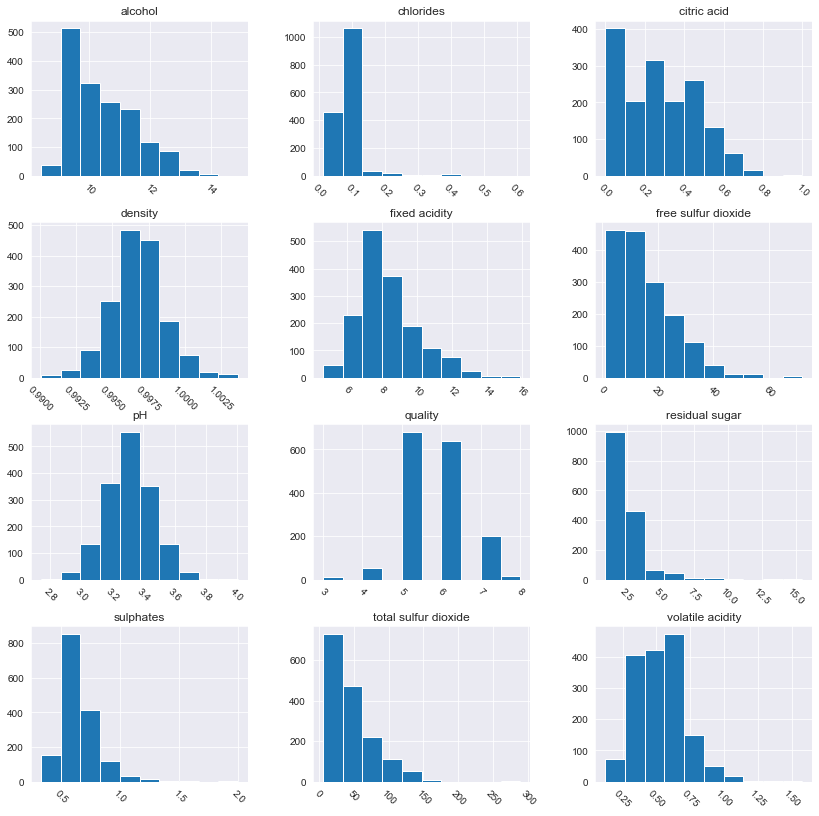

In [9]:
df.hist(figsize=(14,14), xrot=-45, column=sorted(df.columns))
plt.show()

#### Relationship of target variable with the features
We can visualize the distribution of our target variable vs the other features to look for patterns that could help us in our analysis.

The violin plots can also help us look for outliers in the data.

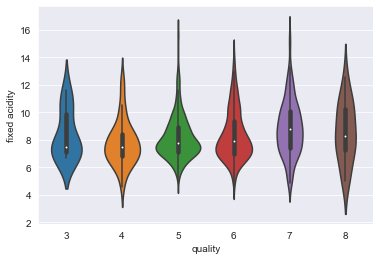

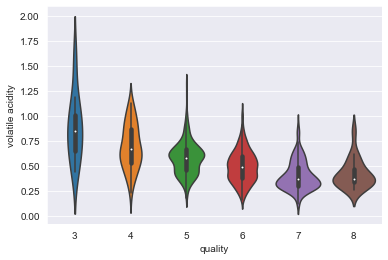

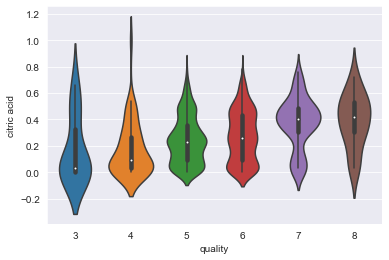

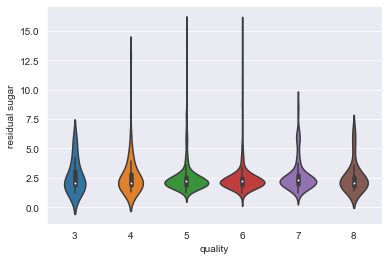

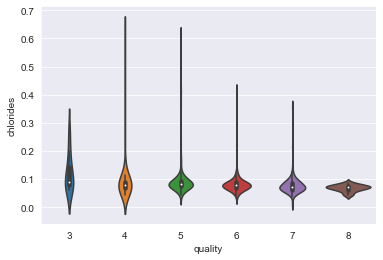

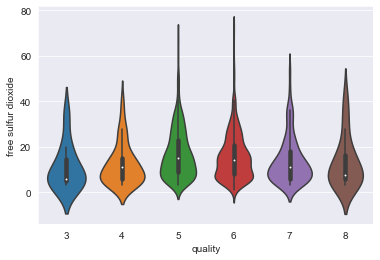

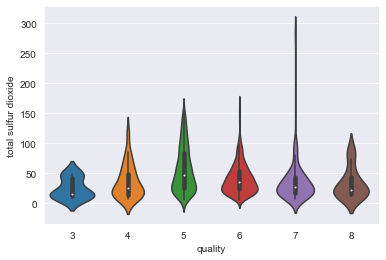

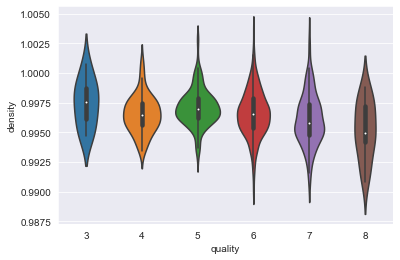

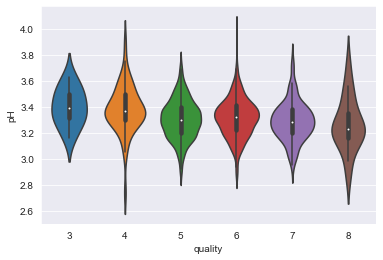

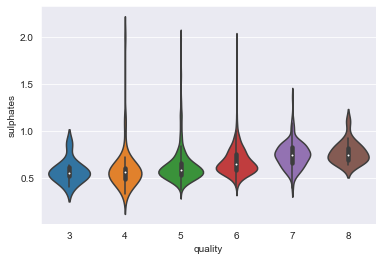

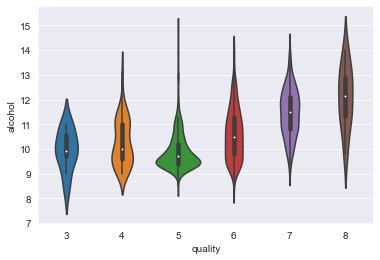

In [10]:
columns = list(df.columns)
columns.remove('quality')
for col in columns:
    sns.violinplot(x="quality", y=col, data=df)
    plt.show()

We can also take a look at the correlations between the variables with the help of a heatmap.

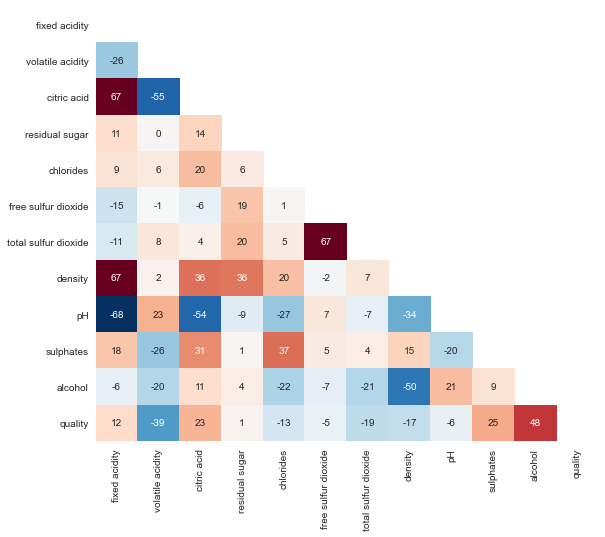

In [11]:
# calculate correlations
correlations = df.corr()

# create a mask to see only the bottom triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

# crate the heatmap
sns.set_style('white')
plt.figure(figsize=(9,8))
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar=False)
plt.show()

It does not seem that the correlations between variables have large absolute values.

The highest correlation is between _total sulfur dioxide_ and _free sulfur dioxide_ which makes sense.

Quality, our target variable, has its highest correlation with _alcohol_and _volatile acidity_ but neither is that high.

#### Additional Visual Exploration
With this correlation information, we can perform some additional visual exploration.

First, lets explore our target variable with the two features that it has the highest correlation: _alcohol_ and _volatile acidity_:

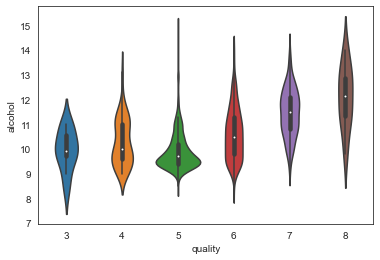

In [12]:
sns.violinplot(x="quality", y="alcohol", data=df)
plt.show()

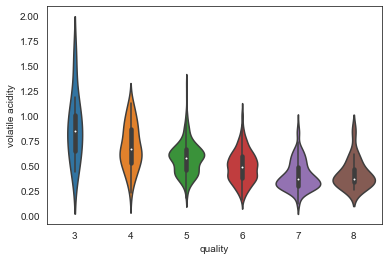

In [13]:
sns.violinplot(x="quality", y="volatile acidity", data=df)
plt.show()

#### We can also inspect pairs of highly correlated variables

Lets visualize 3 variable pairs with high correlation:
* _fixed acidity_ vs _citric acid_
* _density_ vs _fixed acidity_
* _total sulfur dioxide_ vs _free sulfur dioxide_

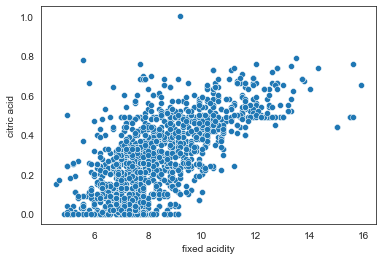

In [14]:
sns.scatterplot(x="fixed acidity", y="citric acid", data=df)
plt.show()

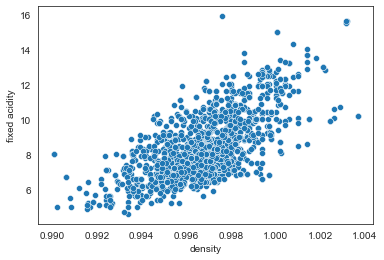

In [15]:
sns.scatterplot(x="density", y="fixed acidity", data=df)
plt.show()

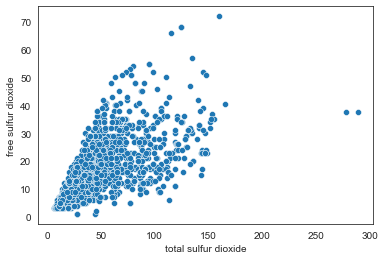

In [16]:
sns.scatterplot(x="total sulfur dioxide", y="free sulfur dioxide", data=df)
plt.show()

## 4. Data Cleaning

Look for duplicated rows

In [17]:
duplicated_rows = df[df.duplicated()]
display(duplicated_rows)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


This seems to be that several wine tasters rated the same wine similarly. We will keep the duplicates for now.

From our visual exploration, there does not seem to be other structural errors, outliers or missing data that needs to be fixed for now.


## 5. Feature Engineering

Without further domain knowledge, it is hard to choose interaction features or indicator features that could help us engineer new features. 

We will leave the data as is for now.

Lets create our analytical base table:

In [18]:
df.to_csv('analytical_base_table.csv', index=None)

## 6. Algorithm Selection

#### Regression problem
We can treat this problem as a classification problem with 6 classes (all wines have a score of either 3, 4, 5, 6, 7, or 8). 

We could also see it as a regression problem since the model can predict a continuous value and it will correctly represent the relative quality of the wine. That is, if our model predicts a wine to have quality 3.1 and the true value was 3, we can see it as good prediction.  
I believe it is a better approach to model the problem as a regression problem. 

#### Algorithms to test
We will use the following algorithms and see which one performs best:

* Lasso Linear Regression
* Ridge Linear Regression
* ElasticNet Linear Regression
* Random Forest Regressor
* Gradient Boosting Regressor

I chose the first three because the regularization they provide normally improves the linear regression, especially in a case like this where there linear regression has many variables to fit.

Random Forest and Gradient Boosting Regressors are normally good choices in regression problems. 

#### Hyperparameter tuning
For Lasso and Ridge we will tune the alpha parameter. For ElasticNet we will focus on the alpha and the l1 ratio.

For the Random Forest Regressor we will focus on the number of trees and the number of features to use per tree.

For the Gradient Boosting Regressor we will tune the number of estimators, the learning rate and the maximum depth.

## 7. Model Training

Now that we have selected our algorithms, we can start to train them on the red wine data. The first step is to separate the features from our target variable:

In [19]:
y = df.quality
X = df.drop('quality', axis=1)

We can now split our data into train and test data. We will keep 20% for testing and train and select the model on the train split. We also set random_state to 775 for reproducibility.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=775)

From our exploration, we saw that we have different ranges of values in our data. Our models will be better if the data has similar scales, so we will add a scaling step to our pipeline. 

#### Create pipelines dictionary
With this dictionary, we can keep our pipelines for each algorithm in the same place. We will set random_state to 111 for repoducibility.

In [21]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=111)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=111)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=111)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=111)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=111)),
}

As a sanity check, lets confirm that the pipelines were created:

In [22]:
for pipeline in pipelines:
    print(pipeline, type(pipelines[pipeline]))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


#### Create hyperparameters dictionary
The next step will be to train our algorithms. We will create a dictionary with the hyperparameters to tune for each algorithm. As an intermediate step, I like to take a look at the tunable parameters for each algorithm so that we can:
* get the name of the hyperparameter correctly
* make sure not to miss an important hyperparameter

In [23]:
for pipeline in pipelines:
    display(pipelines[pipeline].get_params())

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(random_state=111))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(random_state=111),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 111,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('ridge', Ridge(random_state=111))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'ridge': Ridge(random_state=111),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': False,
 'ridge__random_state': 111,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('elasticnet', ElasticNet(random_state=111))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'elasticnet': ElasticNet(random_state=111),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'elasticnet__alpha': 1.0,
 'elasticnet__copy_X': True,
 'elasticnet__fit_intercept': True,
 'elasticnet__l1_ratio': 0.5,
 'elasticnet__max_iter': 1000,
 'elasticnet__normalize': False,
 'elasticnet__positive': False,
 'elasticnet__precompute': False,
 'elasticnet__random_state': 111,
 'elasticnet__selection': 'cyclic',
 'elasticnet__tol': 0.0001,
 'elasticnet__warm_start': False}

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=111))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=111),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregresso

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingregressor', GradientBoostingRegressor(random_state=111))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingregressor': GradientBoostingRegressor(random_state=111),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_decrease': 0.0,
 'gradientboostingregressor__min_impurity_split': None,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min

After checking, we can now create the hyperparameter grid. First we create a dictionary for each algorithm with the hyperparameters we wan to tune and the values to use.

In [24]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

And to keep everything in one place, we create a dictionary with all the hyperparameter dictionaries:

In [25]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,  
    'gb' : gb_hyperparameters
}

With this setup, we can now loop over our dictionary and train each of our algorithms and tune the hyperparameters all in one step. We will use 10 fold cross validation for the hyperparameter tuning.

In [26]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


#### Choose the best performing algorithm
It seems that Random Forest gets the best results.

In [27]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.3383119396576043
ridge 0.3358928631823054
enet 0.33852959502698293
rf 0.4771881893295019
gb 0.4288232628651968


Lets calculate the R squared error and the Mean Squared error to select the best algorithm:

In [28]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('-'*8)
    print(f'R^2: {r2_score(y_test, pred)}')
    print(f'MSE: {mean_squared_error(y_test, pred)}')
    print()

lasso
--------
R^2: 0.3490142565531177
MSE: 0.4594980327206759

ridge
--------
R^2: 0.3549667537255231
MSE: 0.45529646491672776

enet
--------
R^2: 0.3485283180803799
MSE: 0.45984103220183814

rf
--------
R^2: 0.5028280966809171
MSE: 0.35092859375

gb
--------
R^2: 0.46754707399826556
MSE: 0.37583168982890003



Random Forest gives us the best R squared and the lowest MSE.

We can visualize predicted versus actual values using our trained model.

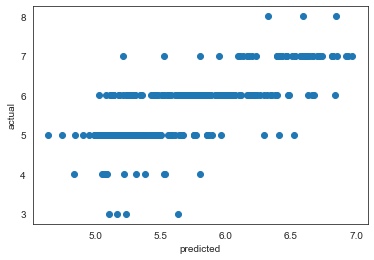

In [29]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

We can also get a look at the parameters that worked best for this algorithm:

In [30]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=200,
                                       random_state=111))])

#### Save the final model
We can now create a pickle file of our best model

In [31]:
with open('final_model_red.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

## 8. Insights & Analysis

Random forest beat out boosted trees and regularized regression approaches. 

A mean squared error lower that 0.35 is enough to help winemakers to estimate ratings and supplement their regular testing protocols.

This model could be further improved in several ways:
* Acquire domain expertise to get more context on the features
* Engineer better features through domain knowledge or even trial and error